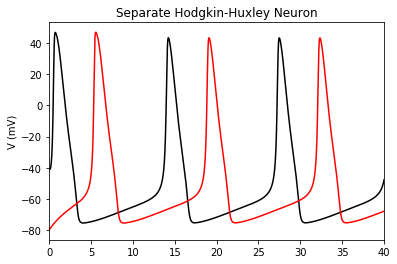

In [52]:
##Separate Hodgkin-Huxley Neuron##
import scipy as sp
import pylab as plt
from scipy.integrate import odeint

class HodgkinHuxley():
    C_m  =   1.0
    g_Na = 120.0
    g_K  =  36.0
    g_L  =   0.3
    E_Na =  50.0
    E_K  = -77.0
    E_L  = -54.387
    
    t = sp.arange(0.0, 450.0, 0.01)
    
    def alpha_m(self, V):
        return 0.1*(V+40.0)/(1.0-sp.exp(-(V+40.0)/10.0))
    def beta_m(self, V):
        return 4.0*sp.exp(-(V+65.0)/18.0)
    def alpha_h(self, V):
        return 0.07*sp.exp(-(V+65.0)/20.0)
    def beta_h(self, V):
        return 1.0/(1.0 + sp.exp(-(V+35.0)/10.0))
    def alpha_n(self, V):
        return 0.01*(V+55.0)/(1.0-sp.exp(-(V+55.0)/10.0))
    def beta_n(self, V):
        return 0.125*sp.exp(-(V+65)/80.0)
    def I_Na(self, V, m, h):
        return self.g_Na*m**3*h*(V-self.E_Na)
    def I_K(self, V, n):
        return self.g_K*n**6*(V-self.E_K)
    def I_L(self, V):
        return self.g_L*(V-self.E_L)
    
    @staticmethod
    def dALL1dt(X, t, self):
        V1, m1, h1, n1 = X
        dV1dt=(-self.I_Na(V1, m1, h1) - self.I_K(V1, n1) - self.I_L(V1)) / self.C_m
        dm1dt = self.alpha_m(V1) * (1.0-m1) - self.beta_m(V1) * m1
        dh1dt = self.alpha_h(V1) * (1.0-h1) - self.beta_h(V1) * h1
        dn1dt = self.alpha_n(V1) * (1.0-n1) - self.beta_n(V1) * n1
        return dV1dt, dm1dt, dh1dt, dn1dt
    
    @staticmethod
    def dALL2dt(X, t, self):
        V1, m1, h1, n1 = X
        dV1dt=(-self.I_Na(V1, m1, h1) - self.I_K(V1, n1) - self.I_L(V1)) / self.C_m
        dm1dt = self.alpha_m(V1) * (1.0-m1) - self.beta_m(V1) * m1
        dh1dt = self.alpha_h(V1) * (1.0-h1) - self.beta_h(V1) * h1
        dn1dt = self.alpha_n(V1) * (1.0-n1) - self.beta_n(V1) * n1
        return dV1dt, dm1dt, dh1dt, dn1dt
    
    def Main(self):
        X1 = odeint(self.dALL1dt, [-41, 0.05, 0.6, 0.32], self.t, args=(self,))        
        X2 = odeint(self.dALL2dt, [-80, 0.05, 0.6, 0.32], self.t, args=(self,))
        V1 = X1[:,0]
        m1 = X1[:,1]
        h1 = X1[:,2]
        n1 = X1[:,3]
        V2 = X2[:,0]
        m2 = X2[:,1]
        h2 = X2[:,2]
        n2 = X2[:,3]
        

        plt.figure()
        plt.title('Separate Hodgkin-Huxley Neuron')
        plt.plot(self.t, V1, 'k')
        plt.plot(self.t, V2, 'r')
        plt.ylabel('V (mV)')
        plt.xlim(0,40)
        plt.show()
if __name__ == '__main__':
    runner = HodgkinHuxley()
    runner.Main()

In [53]:
##Test##
def v(V1, V2):
    if V1 < V2:
        x = 1
        y = 2
    elif V1 > V2:
        x = 3
        y = 4
    else:
        x = 5
        y = 6
    return x, y
print(v(7, 234))
print(v(20, 1))
print(v(7, 7))

(1, 2)
(3, 4)
(5, 6)


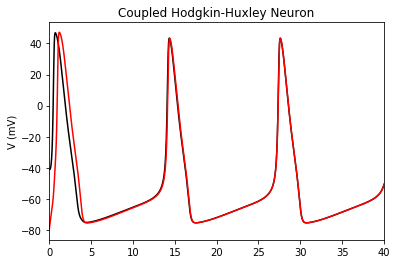

In [54]:
##Coupled Hodgkin-Huxley Neuron##
import scipy as sp
import pylab as plt
from scipy.integrate import odeint

class HodgkinHuxley():
    C_m  =   1.0
    g_Na = 120.0
    g_K  =  36.0
    g_L  =   0.3
    E_Na =  50.0
    E_K  = -77.0
    E_L  = -54.387
    
    t = sp.arange(0.0, 450.0, 0.01)
    
    def alpha_m(self, V):
        return 0.1*(V+40.0)/(1.0-sp.exp(-(V+40.0)/10.0))
    def beta_m(self, V):
        return 4.0*sp.exp(-(V+65.0)/18.0)
    def alpha_h(self, V):
        return 0.07*sp.exp(-(V+65.0)/20.0)
    def beta_h(self, V):
        return 1.0/(1.0 + sp.exp(-(V+35.0)/10.0))
    def alpha_n(self, V):
        return 0.01*(V+55.0)/(1.0-sp.exp(-(V+55.0)/10.0))
    def beta_n(self, V):
        return 0.125*sp.exp(-(V+65)/80.0)
    def I_Na(self, V, m, h):
        return self.g_Na*m**3*h*(V-self.E_Na)
    def I_K(self, V, n):
        return self.g_K*n**6*(V-self.E_K)
    def I_L(self, V):
        return self.g_L*(V-self.E_L)
    
    @staticmethod
    def Couple(X, t, self):
        V1, m1, h1, n1, V2, m2, h2, n2 = X
        R = 1
        if V1 < V2:
            dV1dt=((V2-V1)/R - self.I_Na(V1, m1, h1) - self.I_K(V1, n1) - self.I_L(V1)) / self.C_m
            dV2dt=(-self.I_Na(V2, m2, h2) - self.I_K(V2, n2) - self.I_L(V2)) / self.C_m
        elif V1 > V2:
            dV1dt=(-self.I_Na(V1, m1, h1) - self.I_K(V1, n1) - self.I_L(V1)) / self.C_m
            dV2dt=((V1-V2)/R - self.I_Na(V2, m2, h2) - self.I_K(V2, n2) - self.I_L(V2)) / self.C_m
        else:
            dV1dt=(-self.I_Na(V1, m1, h1) - self.I_K(V1, n1) - self.I_L(V1)) / self.C_m
            dV2dt=(-self.I_Na(V2, m2, h2) - self.I_K(V2, n2) - self.I_L(V2)) / self.C_m
        dm1dt = self.alpha_m(V1) * (1.0-m1) - self.beta_m(V1) * m1
        dh1dt = self.alpha_h(V1) * (1.0-h1) - self.beta_h(V1) * h1
        dn1dt = self.alpha_n(V1) * (1.0-n1) - self.beta_n(V1) * n1
        dm2dt = self.alpha_m(V2) * (1.0-m2) - self.beta_m(V2) * m2
        dh2dt = self.alpha_h(V2) * (1.0-h2) - self.beta_h(V2) * h2
        dn2dt = self.alpha_n(V2) * (1.0-n2) - self.beta_n(V2) * n2
        return dV1dt, dm1dt, dh1dt, dn1dt,  dV2dt, dm2dt, dh2dt, dn2dt
    
    def Main(self):
        X = odeint(self.Couple, [-41, 0.05, 0.6, 0.32, -80, 0.05, 0.6, 0.32], self.t, args=(self,))
        V1 = X[:,0]
        m1 = X[:,1]
        h1 = X[:,2]
        n1 = X[:,3]
        V2 = X[:,4]
        m2 = X[:,5]
        h2 = X[:,6]
        n2 = X[:,7]

        plt.figure()
        plt.title('Coupled Hodgkin-Huxley Neuron')
        plt.plot(self.t, V1, 'k')
        plt.plot(self.t, V2, 'r')
        plt.ylabel('V (mV)')
        plt.xlim(0,40)
        plt.show()
if __name__ == '__main__':
    runner = HodgkinHuxley()
    runner.Main()